### 패키지 참조

In [40]:
from pandas import read_excel
from pandas import DataFrame
from matplotlib import pyplot as plt
from pandas import read_excel, pivot_table
import numpy as np

### 그래프 전역 설정

In [18]:
# 한글 폰트 설정
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12

#그래프 크기 설정
plt.rcParams['figure.figsize'] = (20,5)

# 유니코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

### 문제 1 (Line plot)
-이 데이터를 활용하여 날짜별 종가와 시가가 어떻게 변화하고 있는지 보여주고자 한다. 단, x축의 간격을 30일 간격으로 설정하여 구현하시오.

### 데이터 가져오기

In [91]:
df = read_excel("https://data.hossam.kr/D01/bitcoin.xlsx")
df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
1,2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2,2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
3,2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
4,2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...,...
755,2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
756,2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
757,2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199
758,2023-06-29,30445.7,30077.3,30823.1,30051.3,49.57K,0.0122


### x좌표

In [ ]:
### x좌표(30일단위)를 위한 리스트 생성
x = list(range(0, len(df['날짜'])))
x

In [ ]:
### xticks 함수에서 사용할 x좌표 생성
xticks = list(range(0,len(df['날짜']),30))
xticks

In [ ]:
### xticks 함수에서 출력할 날짜값 추출
date = []
for i in xticks:
    date.append(df['날짜'][i].strftime("%y/%m/%d"))
date

### 시각화

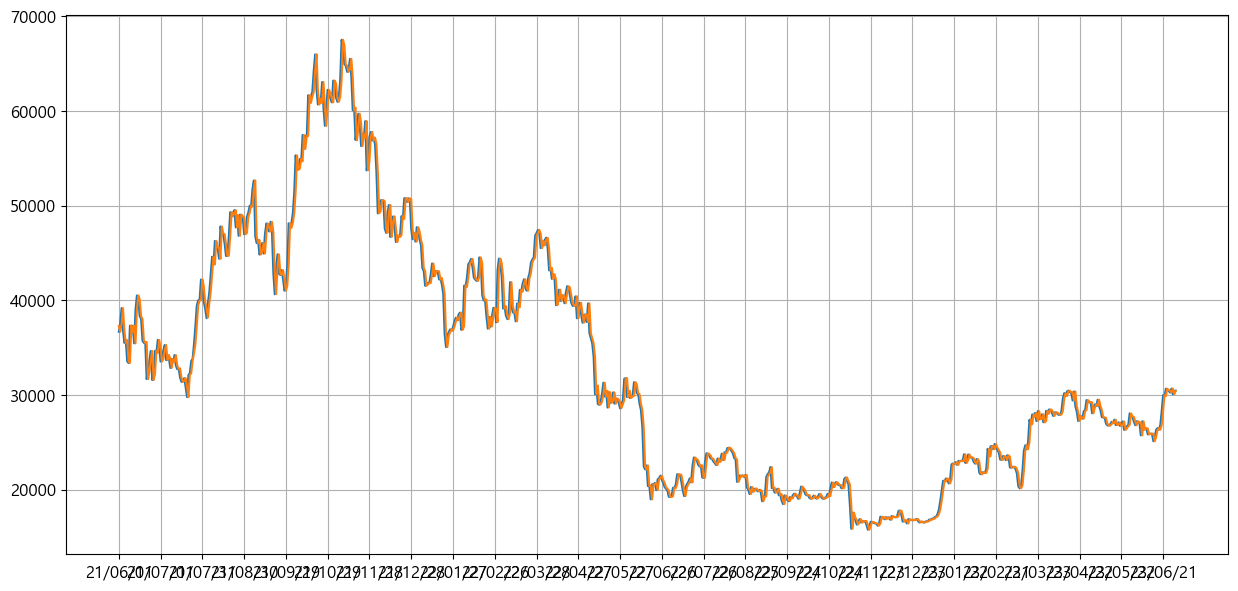

In [109]:
plt.figure()

plt.plot(x, df['종가'])
plt.plot(x, df['시가'])
plt.xticks(xticks,date)
plt.grid()
plt.show()
plt.close()

### 문제2 (bar plot)
-복지시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하시오.

### 데이터 가져오기

In [50]:
df2 = read_excel("https://data.hossam.kr/D01/senior_lsf.xlsx")
df3 = df2.sort_values('복지시설', ascending=False)
df3.head(10)

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
16,Guro-gu,192
14,Yangcheon-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


### 시각화

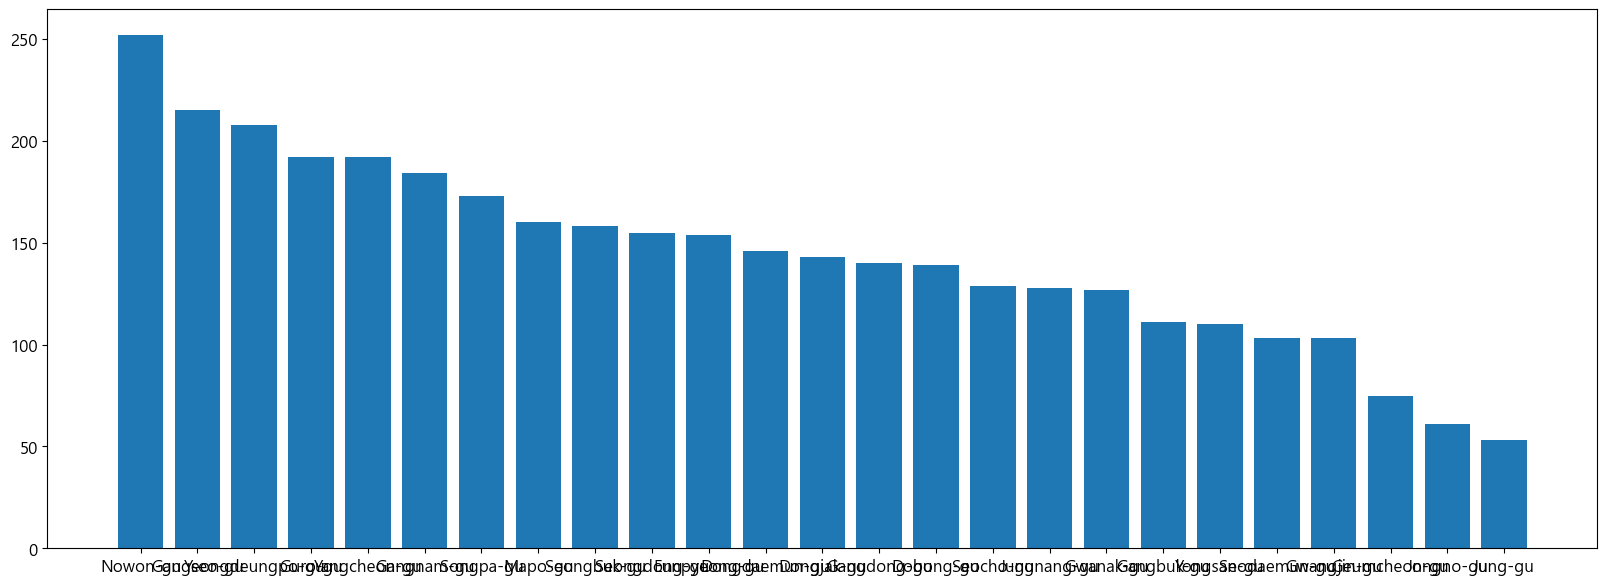

In [52]:
# 3. 상위10개 지역 복지 시설수 시각화
# x = 지역명 y=복지시설
plt.rcParams['figure.figsize'] = (20,7)
plt.figure()
plt.bar(df3['지역명'],df3['복지시설'])
plt.show()
plt.close()


### 문제3.
- 각 도시별로 2015년도의 2010년도의 인구수를 비교하는 자료를 시각화 하시오.

단, 인구수의 표현 범위는 200만~1000만으로 한다.

#### 데이터 불러오기

In [53]:
df4 = read_excel("https://data.hossam.kr/D01/city_people.xlsx")
df4

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


#### 데이터 전처리

In [54]:
#### 2015년 2010년 데이터 추출
df5 = df4.query("연도 == 2015 or 연도 == 2010")
df5

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [55]:
#### 피벗테이블
df6 = pivot_table(df5, index ='도시',columns='연도', values = '인구')
df6

연도,2010,2015
도시,,
부산,3393191,3448737
서울,9631482,9904312
인천,2632035,2890451


In [56]:
x =  np.array(range(0,len(df6.index)))
x

array([0, 1, 2])

### 시각화

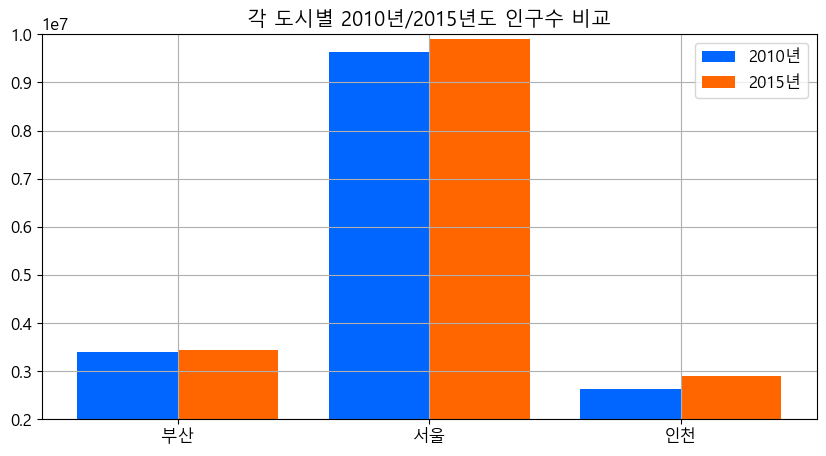

In [58]:
# 3. 각 도시 별로 2015년도의 2010년도의 인구수를 비교하는 자료를 시각화 (단 인구수의 표현범위는 200~1000만)
# 도시별 => 도시가 x축, 연도 => y축, 2015년도 2010년도 인구수->values 
plt.rcParams['figure.figsize'] = (10,5)
plt.figure()
plt.title("각 도시별 2010년/2015년도 인구수 비교")

#각 막대의 색상을 단색으로 지정
# width는 무조건 짝수로 
plt.bar(x-0.2,df6[2010],color='#0066ff', label='2010년', width=0.4)
plt.bar(x+0.2,df6[2015],color='#ff6600', label='2015년', width=0.4)

plt.grid()
plt.legend()
plt.xticks(x,df6.index)
plt.ylim(2000000,10000000)

plt.show()
plt.close()

### 문제4 (bar plot)
- 요구사항 1
종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.

- 요구사항 2
종사자 규모별 업체 수의 비율을 시각화 하시오. 2015년도와 2016년도에 대한 시각화 결과물이 각각(총 2개) 구현되어야 합니다.

### 데이터 불러오기

In [67]:
df7= read_excel("https://data.hossam.kr/D01/jobs_by_scale.xlsx")
df7

,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


### 시각화
#### 요구사항(1)

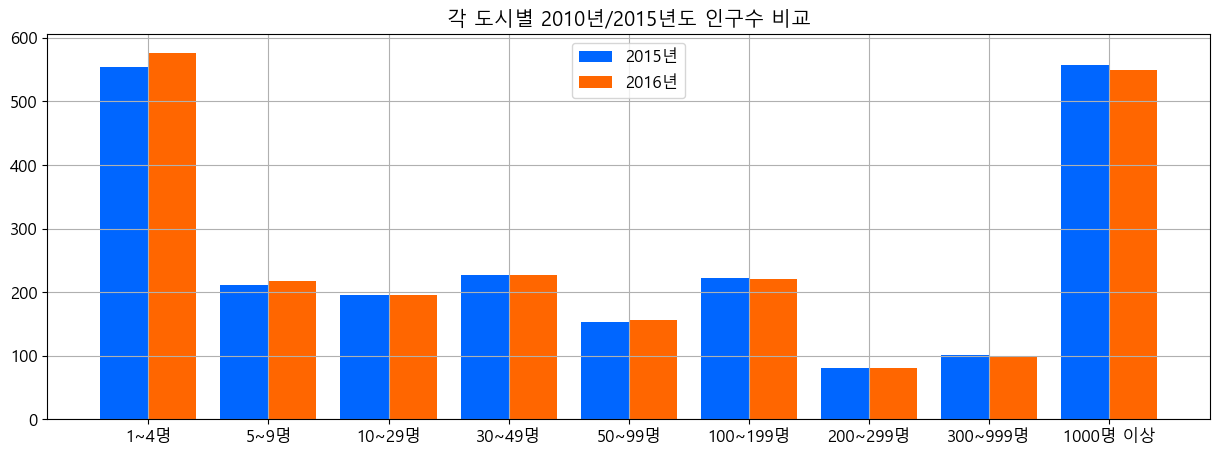

In [78]:
plt.rcParams['figure.figsize'] = (15,5)
plt.figure()
plt.title("각 도시별 2010년/2015년도 인구수 비교")

plt.bar(df7.index-0.2, df7[2015], color='#0066ff', label='2015년', width=0.4)
plt.bar(df7.index+0.2, df7[2016], color='#ff6600', label='2016년', width=0.4)

plt.grid()
plt.legend()
plt.xticks(df7.index, df7['종사자규모별'])

plt.show()
plt.close()

#### 요구사항(2)

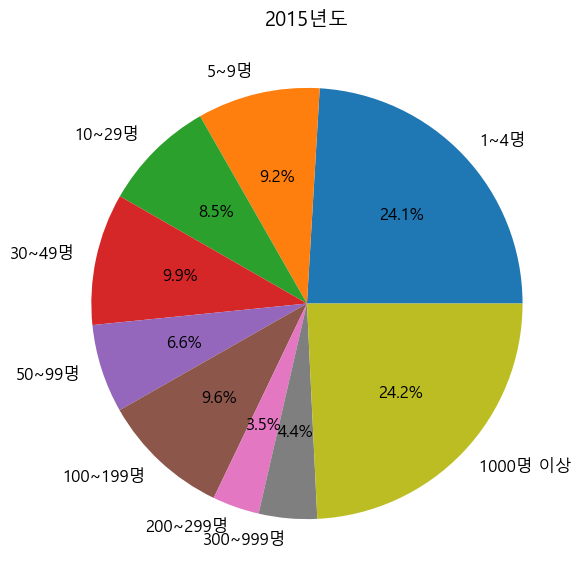

In [80]:
plt.rcParams["figure.figsize"] = (7,7)

plt.figure()
plt.title("2015년도")
plt.pie(df7[2015], labels=df7['종사자규모별'], autopct='%0.1f%%')
plt.show()
plt.close()

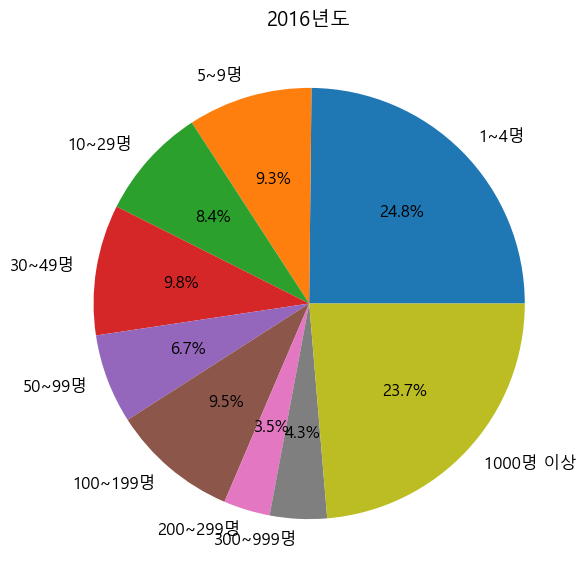

In [81]:
plt.rcParams["figure.figsize"] = (7,7)

plt.figure()
plt.title("2016년도")
plt.pie(df7[2016], labels=df7['종사자규모별'], autopct='%0.1f%%')
plt.show()
plt.close()

### 문제5 (선점도 그래프)
- 교통사고 발생건수와 부상자수의 상관관계를 알아보고자 한다. 적합한 시각화 결과물을 제시하시오.

### 데이터 불러오기

In [71]:
df8 = read_excel("https://data.hossam.kr/D01/traffic_acc.xlsx")
df8

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


### 시각화

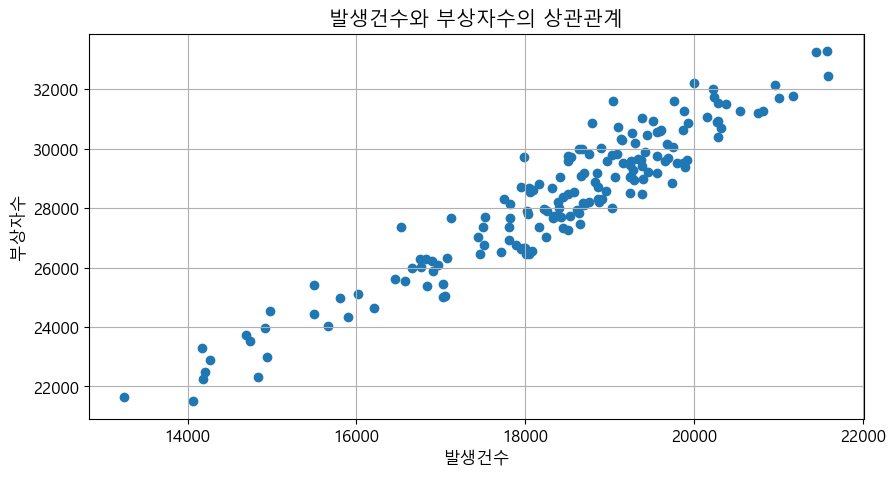

In [74]:
plt.figure()
plt.title("발생건수와 부상자수의 상관관계")
plt.scatter(df8['발생건수'], df8['부상자수'])

plt.xlabel("발생건수")
plt.ylabel("부상자수")
plt.grid()
plt.show()
plt.close()


### 추가 내용 : numpy를 활용한 추세선 구하기(회귀분석)

In [82]:
z= np.polyfit(df8['발생건수'], df8['부상자수'],1)
print("기울기(가중치)=", z[0])
print("절편(편향)=", z[1])

기울기(가중치)= 1.4044180973028615
절편(편향)= 2495.338546755988


In [83]:
# 발생건수에 대한 부상자수 예측
print("f(x) = %f + x + %f" % (z[0],z[1]))


f(x) = 1.404418 + x + 2495.338547


In [84]:
f = np.poly1d(z)
f

poly1d([1.40441810e+00, 2.49533855e+03])

In [85]:
f(1)

2496.7429648532907

In [87]:
f(df8['발생건수'])

array([24255.39254637, 21095.45182744, 25780.59060004, 27517.8557864 ,
       29298.65793378, 27904.07076316, 28722.84651389, 29228.43702892,
       28840.81763406, 30242.42689517, 29360.45233006, 28482.69101925,
       23520.88188148, 22536.38479527, 26043.21678423, 27701.83455715,
       29375.90092913, 26981.36807323, 28665.2653719 , 28889.97226747,
       29590.77689802, 29319.72420524, 30410.95706684, 27095.12593911,
       23440.83004993, 23134.66690472, 28007.99770236, 27852.10729356,
       29550.0487732 , 28210.23390837, 27826.82776781, 27749.58477246,
       28485.49985544, 29215.79726604, 27515.04695021, 26217.3646283 ,
       23197.8657191 , 22404.36949412, 26022.15051277, 27069.84641336,
       29902.55771562, 28932.10481039, 29968.56536619, 28540.27216124,
       27807.16591445, 30479.77355361, 30017.7199996 , 28705.99349672,
       25713.17853137, 24266.62789114, 28089.453952  , 29394.1583644 ,
       30916.54758187, 29528.98250174, 30978.34197816, 30573.86956613,
      

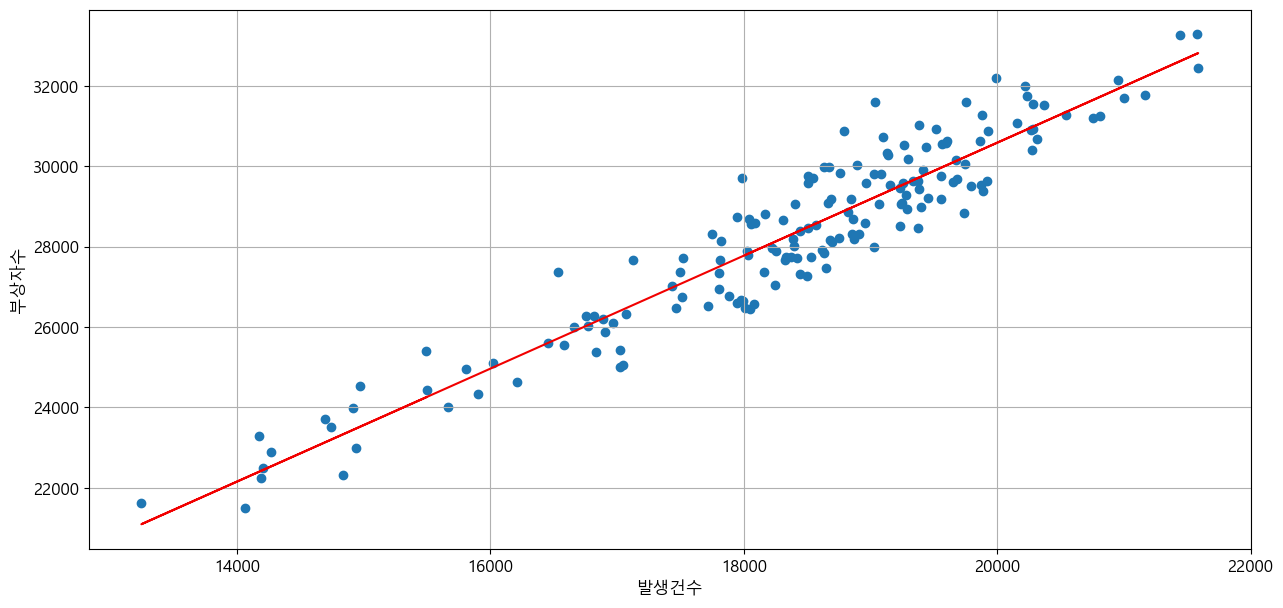

In [89]:
plt.rcParams['figure.figsize'] = (15,7)

plt.figure()
plt.scatter(df8['발생건수'], df8['부상자수'])
plt.plot(df8['발생건수'], f(df8['발생건수']), color="#f10000")
plt.xlabel("발생건수")
plt.ylabel("부상자수")
plt.grid()
plt.show()
plt.close()